In [2]:
import pandas as pd
import numpy as np

/var/folders/kj/jqr6r99s1p945h2yplyzrglr0000gn/T/ipykernel_36349/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Class Incremental

In [3]:
# read keepers/class_incremental_single_guru-trials=5-batch_size=128_window_size=50-feb10.csv
df = pd.read_csv('results/keepers/class_incremental_single_guru-trials=5-batch_size=128_window_size=50-feb10.csv')

In [4]:
df.columns = ["metric", "ensemble_name", "values"]
df.head()

,metric,ensemble_name,values
0,batch_test_acc-mean,full-ensemble,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,batch_test_acc-std,full-ensemble,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,batch_train_acc-mean,full-ensemble,"[0.9969, 0.9984, 0.9953, 0.9984, 0.9953, 0.995..."
3,batch_train_acc-std,full-ensemble,"[0.0038, 0.0031, 0.0062, 0.0031, 0.0038, 0.006..."
4,experience_test_acc-mean,full-ensemble,"[0.0, 0.0, 0.0, 0.0, 0.9646]"


In [5]:
# Make a new df with only the rows where the metric is experience_test_acc-mean or experience_test_acc-std
experience_df = df[df.metric.isin(["experience_test_acc-mean", "experience_test_acc-std"])]
experience_df.head()

,metric,ensemble_name,values
4,experience_test_acc-mean,full-ensemble,"[0.0, 0.0, 0.0, 0.0, 0.9646]"
5,experience_test_acc-std,full-ensemble,"[0.0, 0.0, 0.0, 0.0, 0.0017]"
10,experience_test_acc-mean,random_better-accuracy_score-num_gurus-1,"[0.1813, 0.0037, 0.5354, 0.6631, 0.2906]"
11,experience_test_acc-std,random_better-accuracy_score-num_gurus-1,"[0.2292, 0.0032, 0.3123, 0.3544, 0.3394]"
16,experience_test_acc-mean,random_better-accuracy_score-num_gurus-2,"[0.0126, 0.0, 0.1211, 0.9385, 0.4469]"


In [6]:
avgs = pd.read_csv('results/keepers/class_inc_avgs.csv')
avgs.head(100)

,Unnamed: 0,name,mean,std
0,0,probabilistic_better-balanced_accuracy_score-n...,0.407942,0.038736
1,1,probabilistic_weighted-balanced_accuracy_score...,0.388870,0.072829
2,2,probabilistic_better-accuracy_score-num_gurus-1,0.378865,0.031321
3,3,random_better-balanced_accuracy_score-num_gurus-1,0.378028,0.041257
4,4,random_better-f1_score-num_gurus-1,0.370534,0.047967
5,5,probabilistic_weighted-accuracy_score-num_gurus-1,0.367306,0.061013
6,6,probabilistic_better-f1_score-num_gurus-1,0.363437,0.049416
7,7,probabilistic_weighted-f1_score-num_gurus-1,0.362057,0.073834
8,8,max_diversity-accuracy_score-num_gurus-1,0.348399,0.060176
9,9,max_diversity-f1_score-num_gurus-1,0.338941,0.085126


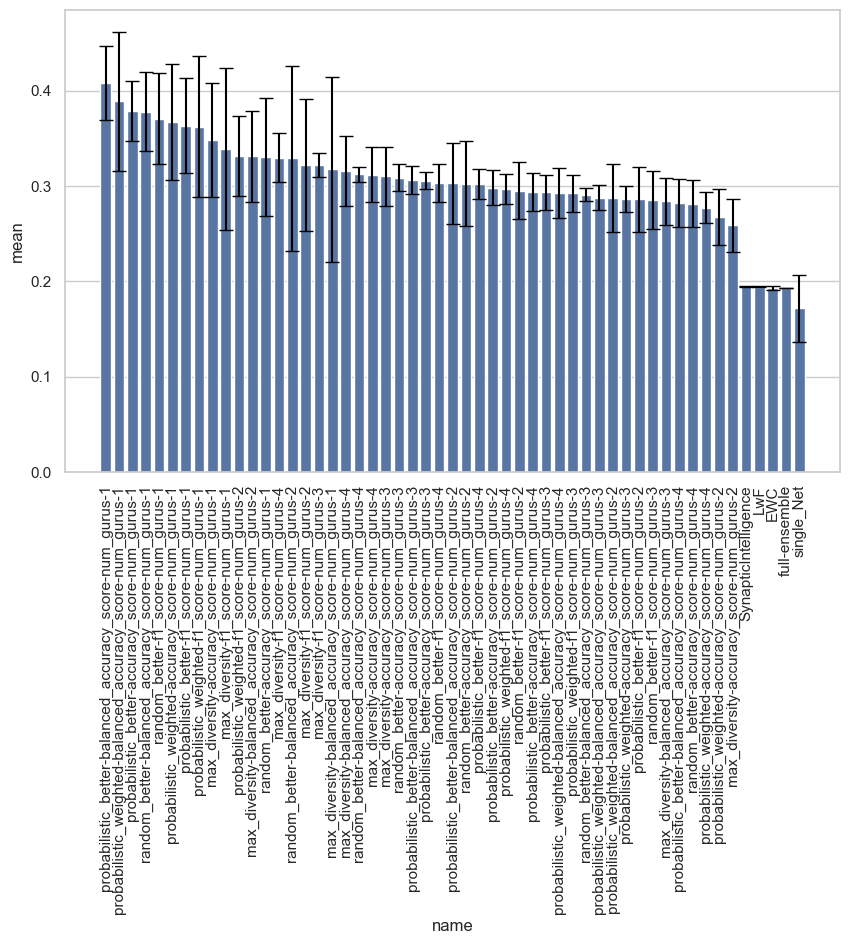

In [7]:
# plot avgs
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="name", y="mean", data=avgs)
#add error bars
plt.errorbar(range(len(avgs)), avgs["mean"], yerr=avgs["std"], fmt='none', c='black', capsize=5)

#rotate x labels
plt.xticks(rotation=90)
plt.show()

one_guru_mean:  0.363 +- 0.024
two_guru_mean:  0.301 +- 0.023
three_guru_mean:  0.298 +- 0.012
four_guru_mean:  0.300 +- 0.015


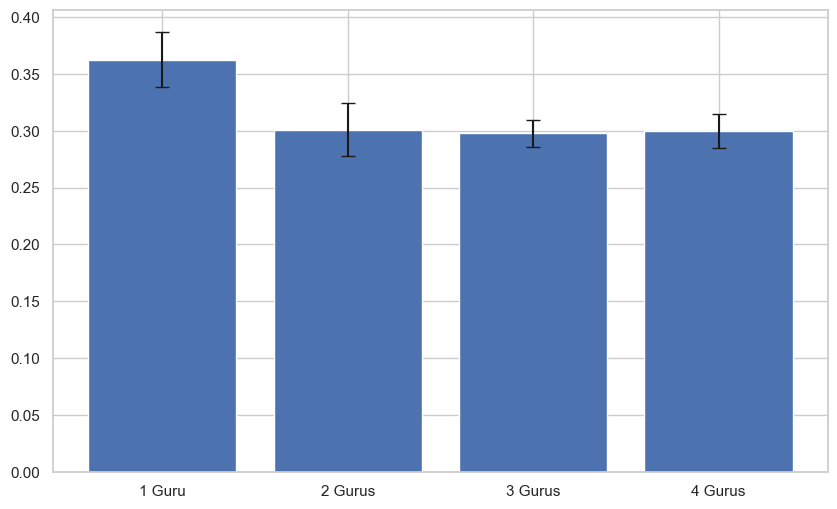

In [8]:
# find the averge of all methods that end in -1
one_guru_mean = np.mean(avgs[avgs['name'].str.endswith('-1')]['mean'])
one_guru_std = np.std(avgs[avgs['name'].str.endswith('-1')]['mean'])
print("one_guru_mean: ", f"{one_guru_mean:.3f}", "+-", f"{one_guru_std:.3f}")
two_guru_mean = np.mean(avgs[avgs['name'].str.endswith('-2')]['mean'])
two_guru_std = np.std(avgs[avgs['name'].str.endswith('-2')]['mean'])
print("two_guru_mean: ", f"{two_guru_mean:.3f}", "+-", f"{two_guru_std:.3f}")
three_guru_mean = np.mean(avgs[avgs['name'].str.endswith('-3')]['mean'])
three_guru_std = np.std(avgs[avgs['name'].str.endswith('-3')]['mean'])
print("three_guru_mean: ", f"{three_guru_mean:.3f}", "+-", f"{three_guru_std:.3f}")
four_guru_mean = np.mean(avgs[avgs['name'].str.endswith('-4')]['mean'])
four_guru_std = np.std(avgs[avgs['name'].str.endswith('-4')]['mean'])
print("four_guru_mean: ", f"{four_guru_mean:.3f}", "+-", f"{four_guru_std:.3f}")

# plot the values
names = ["1 Guru", "2 Gurus", "3 Gurus", "4 Gurus"]
values = [one_guru_mean, two_guru_mean, three_guru_mean, four_guru_mean]
stds = [one_guru_std, two_guru_std, three_guru_std, four_guru_std]
plt.figure(figsize=(10, 6))
plt.bar(names, values, yerr=stds, capsize=5)
plt.show()




prob_better_mean:  0.318 +- 0.039
prob_weighted_mean:  0.311 +- 0.039
random_better_mean:  0.316 +- 0.030
max_diversity_mean:  0.316 +- 0.023


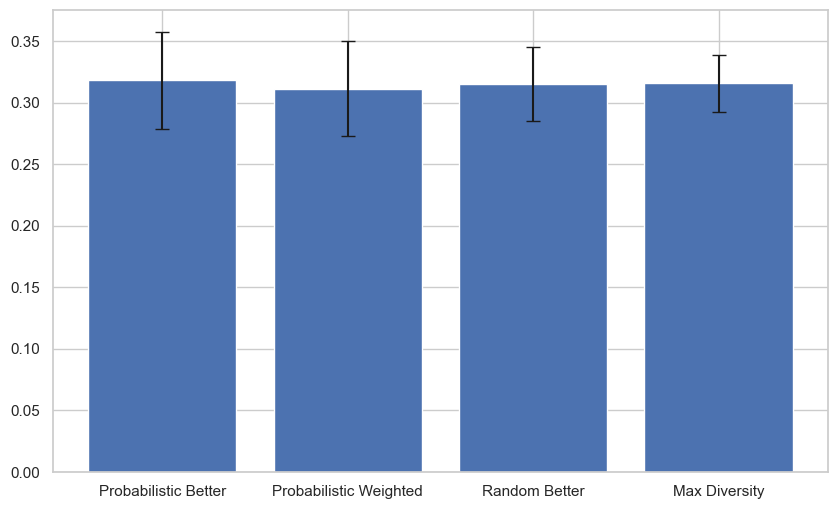

In [9]:
# get the mean of all rows containing "probabilistic-better" in avgs
prob_better_mean = np.mean(avgs[avgs['name'].str.contains('probabilistic_better')]['mean'])
prob_better_std = np.std(avgs[avgs['name'].str.contains('probabilistic_better')]['mean'])
print("prob_better_mean: ", f"{prob_better_mean:.3f}", "+-", f"{prob_better_std:.3f}")

prob_weighted_mean = np.mean(avgs[avgs['name'].str.contains('probabilistic_weighted')]['mean'])
prob_weighted_std = np.std(avgs[avgs['name'].str.contains('probabilistic_weighted')]['mean'])
print("prob_weighted_mean: ", f"{prob_weighted_mean:.3f}", "+-", f"{prob_weighted_std:.3f}")


random_better_mean = np.mean(avgs[avgs['name'].str.contains('random_better')]['mean'])
random_better_std = np.std(avgs[avgs['name'].str.contains('random_better')]['mean'])
print("random_better_mean: ", f"{random_better_mean:.3f}", "+-", f"{random_better_std:.3f}")

max_diversity_mean = np.mean(avgs[avgs['name'].str.contains('max_diversity')]['mean'])
max_diversity_std = np.std(avgs[avgs['name'].str.contains('max_diversity')]['mean'])
print("max_diversity_mean: ", f"{max_diversity_mean:.3f}", "+-", f"{max_diversity_std:.3f}")

# plot the values
names = ["Probabilistic Better", "Probabilistic Weighted", "Random Better", "Max Diversity"]
values = [prob_better_mean, prob_weighted_mean, random_better_mean, max_diversity_mean]
stds = [prob_better_std, prob_weighted_std, random_better_std, max_diversity_std]
plt.figure(figsize=(10, 6))
plt.bar(names, values, yerr=stds, capsize=5)
plt.show()

accuracy_mean:  0.308 +- 0.033
balanced_accuracy_mean:  0.320 +- 0.038
f1_mean:  0.318 +- 0.028


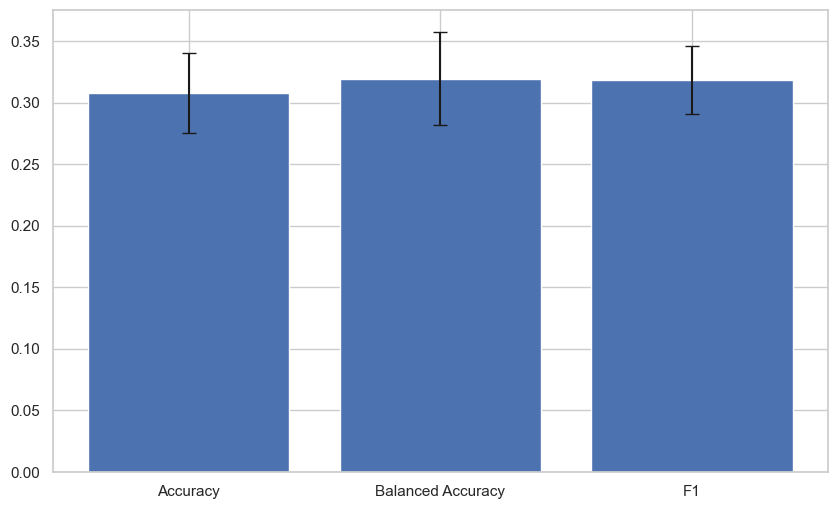

In [10]:
# get the mean of all rows containing "-accuracy" in avgs
accuracy_mean = np.mean(avgs[avgs['name'].str.contains('-accuracy')]['mean'])
accuracy_std = np.std(avgs[avgs['name'].str.contains('-accuracy')]['mean'])
print("accuracy_mean: ", f"{accuracy_mean:.3f}", "+-", f"{accuracy_std:.3f}")

balanced_accuracy_mean = np.mean(avgs[avgs['name'].str.contains('balanced_accuracy')]['mean'])
balanced_accuracy_std = np.std(avgs[avgs['name'].str.contains('balanced_accuracy')]['mean'])
print("balanced_accuracy_mean: ", f"{balanced_accuracy_mean:.3f}", "+-", f"{balanced_accuracy_std:.3f}")

f1_mean = np.mean(avgs[avgs['name'].str.contains('f1')]['mean'])
f1_std = np.std(avgs[avgs['name'].str.contains('f1')]['mean'])
print("f1_mean: ", f"{f1_mean:.3f}", "+-", f"{f1_std:.3f}")

# plot the values
names = ["Accuracy", "Balanced Accuracy", "F1"]
values = [accuracy_mean, balanced_accuracy_mean, f1_mean]
stds = [accuracy_std, balanced_accuracy_std, f1_std]

plt.figure(figsize=(10, 6))
plt.bar(names, values, yerr=stds, capsize=5)
plt.show()

# Domain Incremental

In [11]:
domain_inc_df = pd.read_csv('results/keepers/domain_inc_avgs.csv')
domain_inc_df.head()
#drop Unnamed: 0
domain_inc_df = domain_inc_df.drop(columns=['Unnamed: 0'])

In [12]:
# rename columns
domain_inc_df.columns = ["name", "mean", "std"]
domain_inc_df.head(100)

,name,mean,std
0,random_better-balanced_accuracy_score-num_gurus-2,0.675336,0.018841
1,max_diversity-accuracy_score-num_gurus-2,0.674260,0.025654
2,max_diversity-balanced_accuracy_score-num_gurus-2,0.669043,0.017491
3,random_better-f1_score-num_gurus-3,0.665791,0.016666
4,random_better-balanced_accuracy_score-num_gurus-3,0.664454,0.005944
5,random_better-accuracy_score-num_gurus-3,0.662662,0.007016
6,probabilistic_weighted-balanced_accuracy_score...,0.660716,0.005516
7,probabilistic_weighted-accuracy_score-num_gurus-3,0.659945,0.006871
8,probabilistic_better-balanced_accuracy_score-n...,0.658434,0.006757
9,probabilistic_better-f1_score-num_gurus-3,0.657555,0.006235


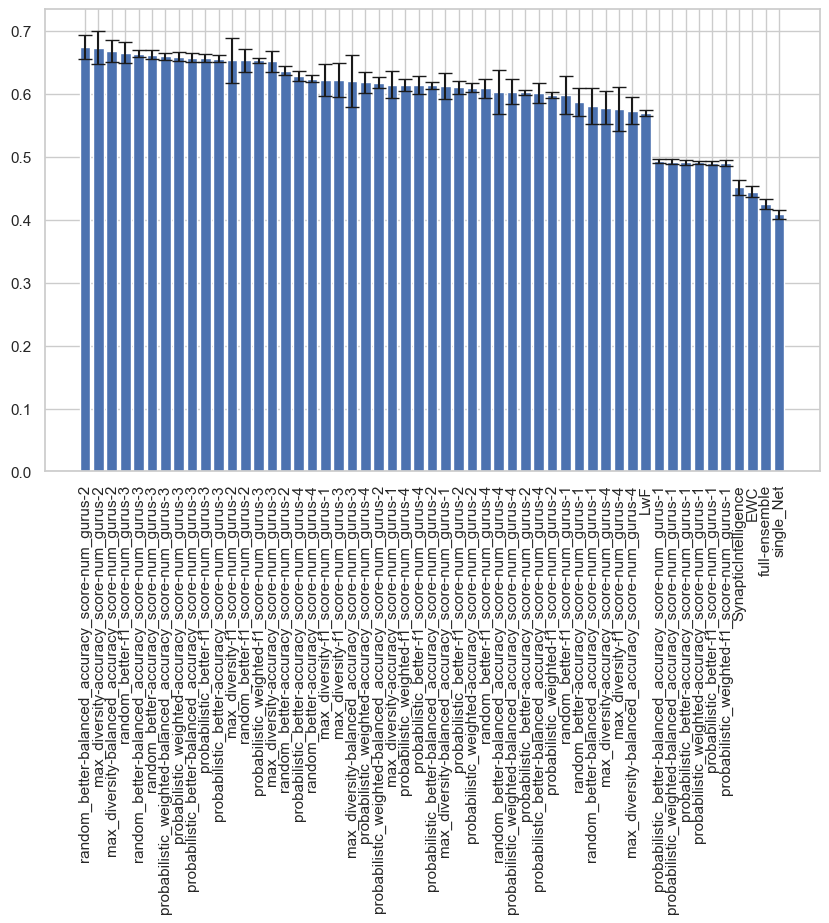

In [13]:
# plot the values
names = domain_inc_df['name']
values = domain_inc_df['mean']
stds = domain_inc_df['std']
plt.figure(figsize=(10, 6))
plt.bar(names, values, yerr=stds, capsize=5)
plt.xticks(rotation=90)
plt.show()

DI_one_guru_mean:  0.548 +- 0.056
DI_two_guru_mean:  0.635 +- 0.028
DI_three_guru_mean:  0.653 +- 0.014
DI_four_guru_mean:  0.604 +- 0.018


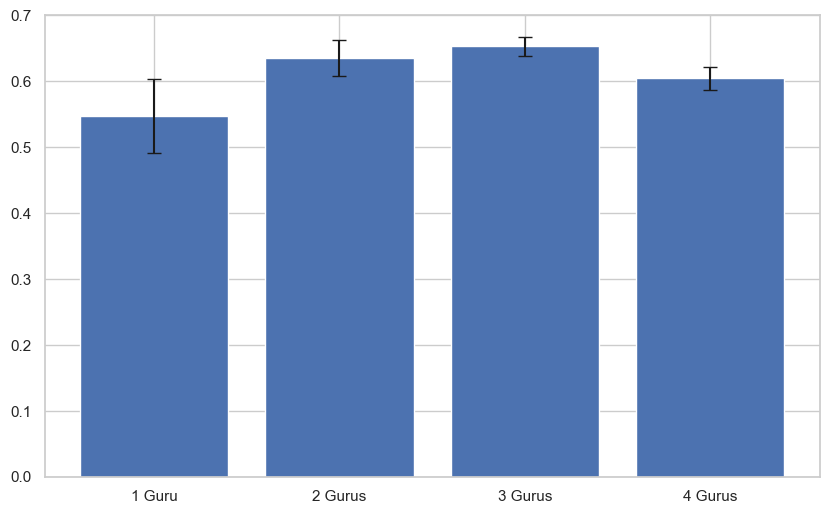

In [14]:
DI_one_guru_mean = np.mean(domain_inc_df[domain_inc_df['name'].str.endswith('-1')]['mean'])
DI_one_guru_std = np.std(domain_inc_df[domain_inc_df['name'].str.endswith('-1')]['mean'])
print("DI_one_guru_mean: ", f"{DI_one_guru_mean:.3f}", "+-", f"{DI_one_guru_std:.3f}")

DI_two_guru_mean = np.mean(domain_inc_df[domain_inc_df['name'].str.endswith('-2')]['mean'])
DI_two_guru_std = np.std(domain_inc_df[domain_inc_df['name'].str.endswith('-2')]['mean'])
print("DI_two_guru_mean: ", f"{DI_two_guru_mean:.3f}", "+-", f"{DI_two_guru_std:.3f}")

DI_three_guru_mean = np.mean(domain_inc_df[domain_inc_df['name'].str.endswith('-3')]['mean'])
DI_three_guru_std = np.std(domain_inc_df[domain_inc_df['name'].str.endswith('-3')]['mean'])
print("DI_three_guru_mean: ", f"{DI_three_guru_mean:.3f}", "+-", f"{DI_three_guru_std:.3f}")

DI_four_guru_mean = np.mean(domain_inc_df[domain_inc_df['name'].str.endswith('-4')]['mean'])
DI_four_guru_std = np.std(domain_inc_df[domain_inc_df['name'].str.endswith('-4')]['mean'])
print("DI_four_guru_mean: ", f"{DI_four_guru_mean:.3f}", "+-", f"{DI_four_guru_std:.3f}")

# plot the values
names = ["1 Guru", "2 Gurus", "3 Gurus", "4 Gurus"]
values = [DI_one_guru_mean, DI_two_guru_mean, DI_three_guru_mean, DI_four_guru_mean]
stds = [DI_one_guru_std, DI_two_guru_std, DI_three_guru_std, DI_four_guru_std]
plt.figure(figsize=(10, 6))
plt.bar(names, values, yerr=stds, capsize=5)
plt.show()

prob_better_mean:  0.594 +- 0.062
prob_weighted_mean:  0.593 +- 0.062
random_better_mean:  0.630 +- 0.032
max_diversity_mean:  0.623 +- 0.033


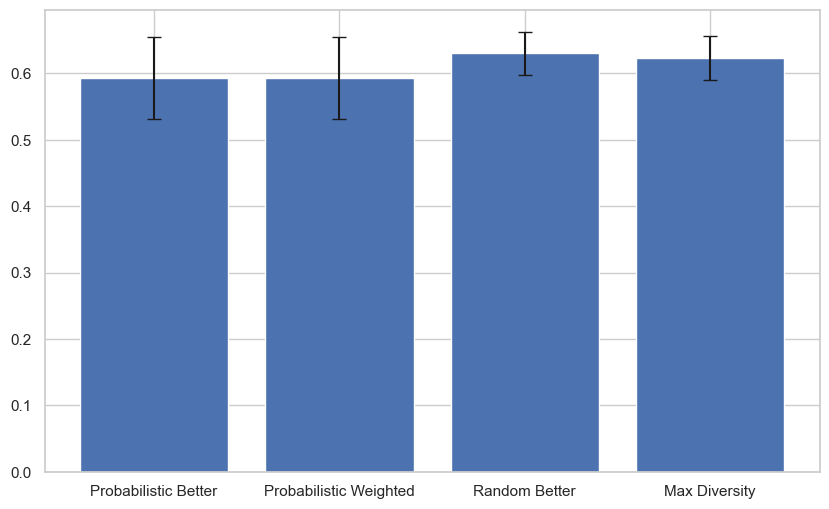

In [15]:
# get the mean of all rows containing "probabilistic-better" in domain_inc_df
prob_better_mean = np.mean(domain_inc_df[domain_inc_df['name'].str.contains('probabilistic_better')]['mean'])
prob_better_std = np.std(domain_inc_df[domain_inc_df['name'].str.contains('probabilistic_better')]['mean'])
print("prob_better_mean: ", f"{prob_better_mean:.3f}", "+-", f"{prob_better_std:.3f}")

prob_weighted_mean = np.mean(domain_inc_df[domain_inc_df['name'].str.contains('probabilistic_weighted')]['mean'])
prob_weighted_std = np.std(domain_inc_df[domain_inc_df['name'].str.contains('probabilistic_weighted')]['mean'])
print("prob_weighted_mean: ", f"{prob_weighted_mean:.3f}", "+-", f"{prob_weighted_std:.3f}")

random_better_mean = np.mean(domain_inc_df[domain_inc_df['name'].str.contains('random_better')]['mean'])
random_better_std = np.std(domain_inc_df[domain_inc_df['name'].str.contains('random_better')]['mean'])
print("random_better_mean: ", f"{random_better_mean:.3f}", "+-", f"{random_better_std:.3f}")

max_diversity_mean = np.mean(domain_inc_df[domain_inc_df['name'].str.contains('max_diversity')]['mean'])
max_diversity_std = np.std(domain_inc_df[domain_inc_df['name'].str.contains('max_diversity')]['mean'])
print("max_diversity_mean: ", f"{max_diversity_mean:.3f}", "+-", f"{max_diversity_std:.3f}")

# plot the values
names = ["Probabilistic Better", "Probabilistic Weighted", "Random Better", "Max Diversity"]
values = [prob_better_mean, prob_weighted_mean, random_better_mean, max_diversity_mean]
stds = [prob_better_std, prob_weighted_std, random_better_std, max_diversity_std]
plt.figure(figsize=(10, 6))
plt.bar(names, values, yerr=stds, capsize=5)
plt.show()


accuracy_mean:  0.612 +- 0.053
balanced_accuracy_mean:  0.609 +- 0.053
f1_mean:  0.609 +- 0.051


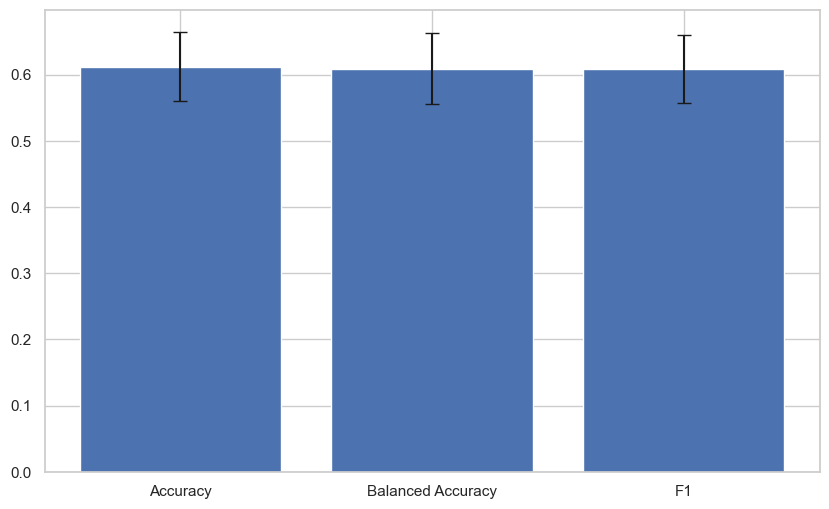

In [16]:
# get the mean of all rows containing "-accuracy" in domain_inc_df
accuracy_mean = np.mean(domain_inc_df[domain_inc_df['name'].str.contains('-accuracy')]['mean'])
accuracy_std = np.std(domain_inc_df[domain_inc_df['name'].str.contains('-accuracy')]['mean'])
print("accuracy_mean: ", f"{accuracy_mean:.3f}", "+-", f"{accuracy_std:.3f}")

balanced_accuracy_mean = np.mean(domain_inc_df[domain_inc_df['name'].str.contains('balanced_accuracy')]['mean'])
balanced_accuracy_std = np.std(domain_inc_df[domain_inc_df['name'].str.contains('balanced_accuracy')]['mean'])
print("balanced_accuracy_mean: ", f"{balanced_accuracy_mean:.3f}", "+-", f"{balanced_accuracy_std:.3f}")

f1_mean = np.mean(domain_inc_df[domain_inc_df['name'].str.contains('f1')]['mean'])
f1_std = np.std(domain_inc_df[domain_inc_df['name'].str.contains('f1')]['mean'])
print("f1_mean: ", f"{f1_mean:.3f}", "+-", f"{f1_std:.3f}")

# plot the values
names = ["Accuracy", "Balanced Accuracy", "F1"]
values = [accuracy_mean, balanced_accuracy_mean, f1_mean]
stds = [accuracy_std, balanced_accuracy_std, f1_std]

plt.figure(figsize=(10, 6))
plt.bar(names, values, yerr=stds, capsize=5)
plt.show()

# Many Voters - Class Incremental

In [21]:
many_v_avgs = pd.read_csv('results/keepers/many_v_class_inc_avgs.csv')
many_v_avgs.head(100)

,Unnamed: 0,name,mean,std
0,0,probabilistic_better-accuracy_score-num_gurus-5,0.422804,0.037718
1,1,max_diversity-accuracy_score-num_gurus-7,0.422772,0.035950
2,2,probabilistic_weighted-accuracy_score-num_gurus-3,0.419584,0.055615
3,3,probabilistic_weighted-accuracy_score-num_gurus-7,0.416250,0.057652
4,4,probabilistic_weighted-accuracy_score-num_gurus-5,0.404036,0.035598
5,5,probabilistic_better-accuracy_score-num_gurus-7,0.397573,0.062486
6,6,max_diversity-accuracy_score-num_gurus-9,0.393321,0.055654
7,7,probabilistic_better-accuracy_score-num_gurus-3,0.392226,0.093979
8,8,max_diversity-accuracy_score-num_gurus-3,0.391827,0.104313
9,9,max_diversity-accuracy_score-num_gurus-5,0.388121,0.050011


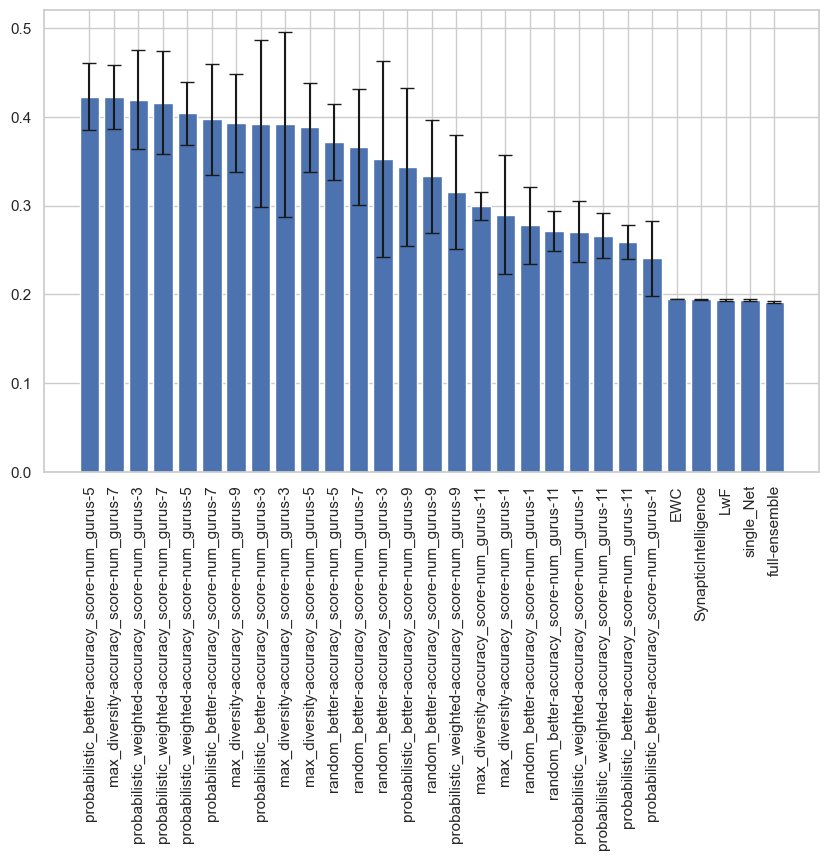

In [22]:
# remove Unnamed: 0
many_v_avgs = many_v_avgs.drop(columns=['Unnamed: 0'])

# rename columns
many_v_avgs.columns = ["name", "mean", "std"]

# plot the values
names = many_v_avgs['name']
values = many_v_avgs['mean']
stds = many_v_avgs['std']
plt.figure(figsize=(10, 6))
plt.bar(names, values, yerr=stds, capsize=5)
plt.xticks(rotation=90)
plt.show()

# Class Incremental with Delegation on Test

In [25]:
del_on_test = pd.read_csv('results/keepers/class_inc_avgs-feb11.csv')
#drop Unnamed: 0
del_on_test = del_on_test.drop(columns=['Unnamed: 0'])

In [27]:
del_on_test.head(10)

,name,mean,std
0,StudentExpert-num_gurus_train-2-num_gurus_test-2,0.921564,0.0
1,StudentExpert-num_gurus_train-1-num_gurus_test-2,0.916574,0.0
2,StudentExpert-num_gurus_train-2-num_gurus_test-1,0.914333,0.0
3,StudentExpert-num_gurus_train-1-num_gurus_test-4,0.889088,0.0
4,StudentExpert-num_gurus_train-1-num_gurus_test-1,0.867338,0.0
5,StudentExpert-num_gurus_train-1-num_gurus_test-3,0.856703,0.0
6,StudentExpert-num_gurus_train-2-num_gurus_test-4,0.843178,0.0
7,StudentExpert-num_gurus_train-3-num_gurus_test-4,0.721750,0.0
8,StudentExpert-num_gurus_train-3-num_gurus_test-3,0.707385,0.0
9,StudentExpert-num_gurus_train-3-num_gurus_test-1,0.697456,0.0


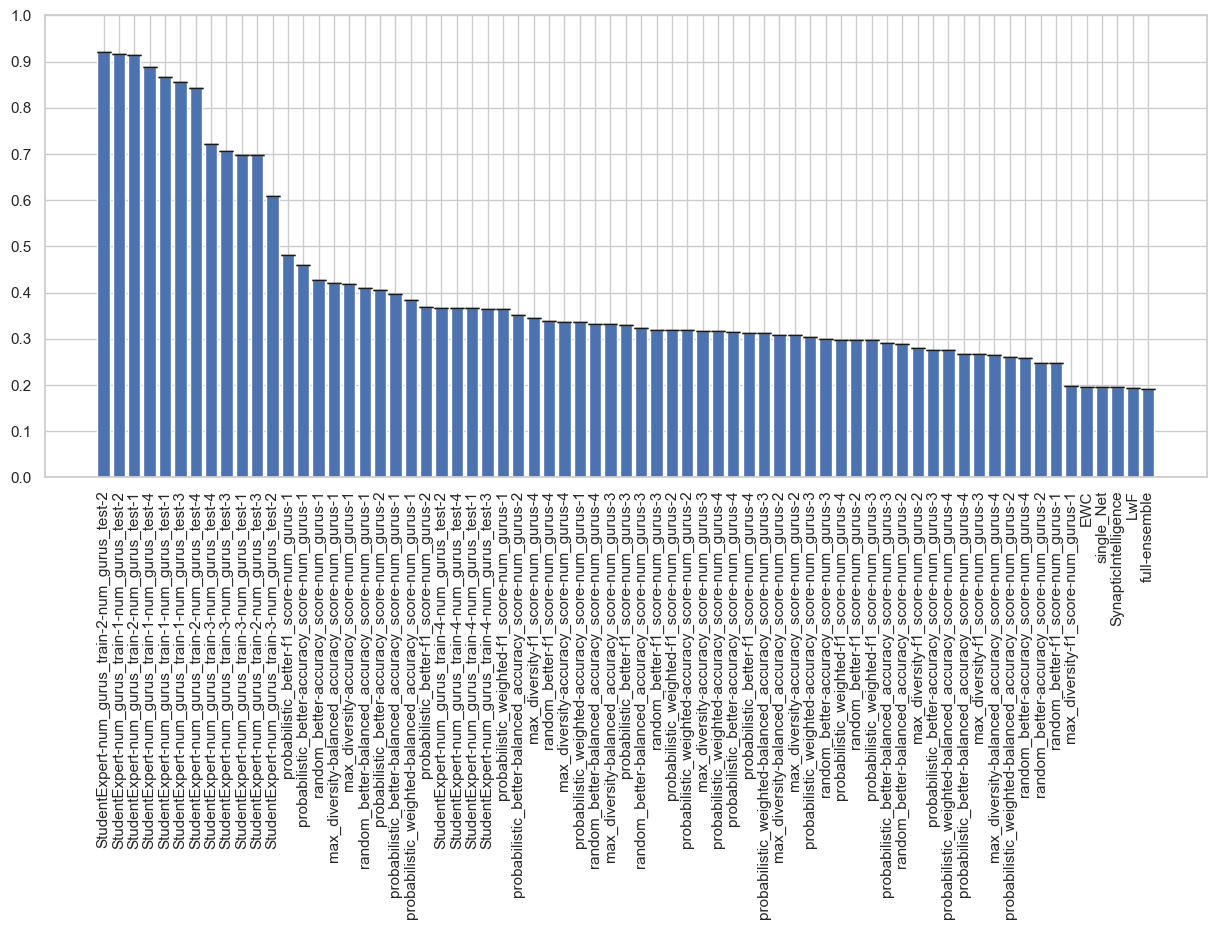

In [29]:
# rename columns
del_on_test.columns = ["name", "mean", "std"]

# plot the values
names = del_on_test['name']
values = del_on_test['mean']
stds = del_on_test['std']
plt.figure(figsize=(15, 6))
plt.bar(names, values, yerr=stds, capsize=5)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.show()